Load DBreast Cancer Dataset. It has 30 dimensions. There are all numerical. They need Normalisation - stardardization for clustering etc.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
names =  dataset.feature_names
target = dataset.target_names
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
y=dataset.target
print("features_name:",names)
print("Target_names:",target)
print(df.head(20))
print(y)

print("df_shape:",df.shape)
print("df_dtypes:",df.dtypes)

features_name: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target_names: ['malignant' 'benign']
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.99         10.38          122.80     1001.0          0.11840   
1         20.57         17.77          132.90     1326.0          0.08474   
2         19.69         21.25          130.00     1203.0          0.10960   
3         11.42         20.38           77.58      386.1          0.14250   
4       

So at this point we have seen our data. We have 30 features all numerical. The y - target value is 0 - 1  and represent the two classes about breast cancer (M = malignant, B = benign). Below with the describe method we get 8 statistical properties for each attribute

describe() returns 8 statistical properties for each attribute

Count: how many values the attribute has
Mean: the mean of all values of the attribute
Standard Deviation: the amount of variation values have. Low σ means values are closer to the mean
Minimum value
25th Percentile: the value under which 25% of the instances can be found
50th Percentile: the value under which 50% of the instances can be found (also called the median, is the value that splits the distribution in half)
75th Percentile: the value under which 75% of the instances can be found
Maximum value


In [2]:
pd.set_option('precision', 3)
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207


In [3]:
#the correlation between attributes. For example worst radius is positive correlated with mean radius 
df.corr(method='pearson')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-3.116e-01,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-7.644e-02,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-2.615e-01,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-2.831e-01,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,5.848e-01,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,5.654e-01,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,3.368e-01,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,1.669e-01,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,4.799e-01,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000e+00,...,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


In [4]:
#Skew of Univariate Distributions

df.skew()

mean radius                0.942
mean texture               0.650
mean perimeter             0.991
mean area                  1.646
mean smoothness            0.456
mean compactness           1.190
mean concavity             1.401
mean concave points        1.171
mean symmetry              0.726
mean fractal dimension     1.304
radius error               3.089
texture error              1.646
perimeter error            3.444
area error                 5.447
smoothness error           2.314
compactness error          1.902
concavity error            5.110
concave points error       1.445
symmetry error             2.195
fractal dimension error    3.924
worst radius               1.103
worst texture              0.498
worst perimeter            1.128
worst area                 1.859
worst smoothness           0.415
worst compactness          1.474
worst concavity            1.150
worst concave points       0.493
worst symmetry             1.434
worst fractal dimension    1.663
dtype: flo

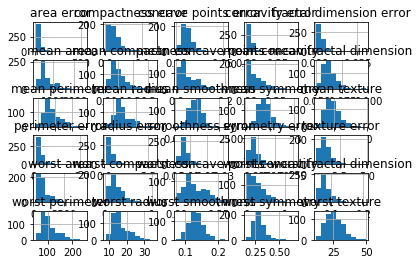

In [5]:
#univariate plots for our attributes
#Histogram Plots

h = df.hist()
plt.show()

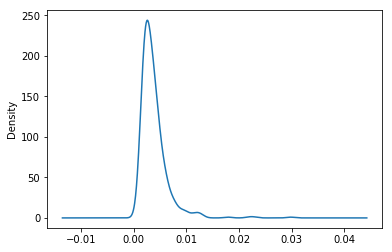

In [6]:
#Density Plots- plot only for Sex attr.
df1 = df['fractal dimension error']
df1.plot(kind='density', layout=(1,1), sharex=False)
plt.show()

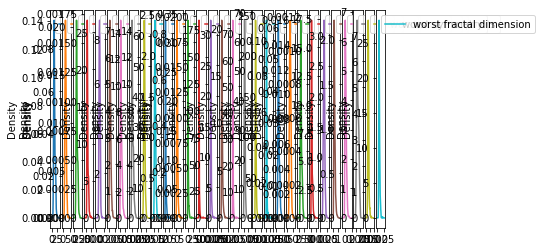

In [7]:
#Density Plots
df.plot(kind='density', subplots=True, layout=(1,30), sharex=False)
plt.show()

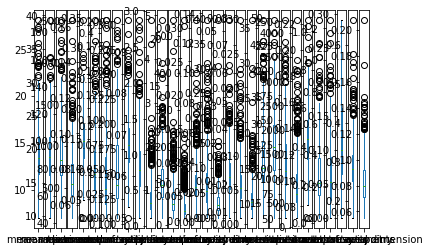

In [8]:
bp = df.plot(kind='box', subplots=True, layout=(1,30), sharex=False)
plt.show()

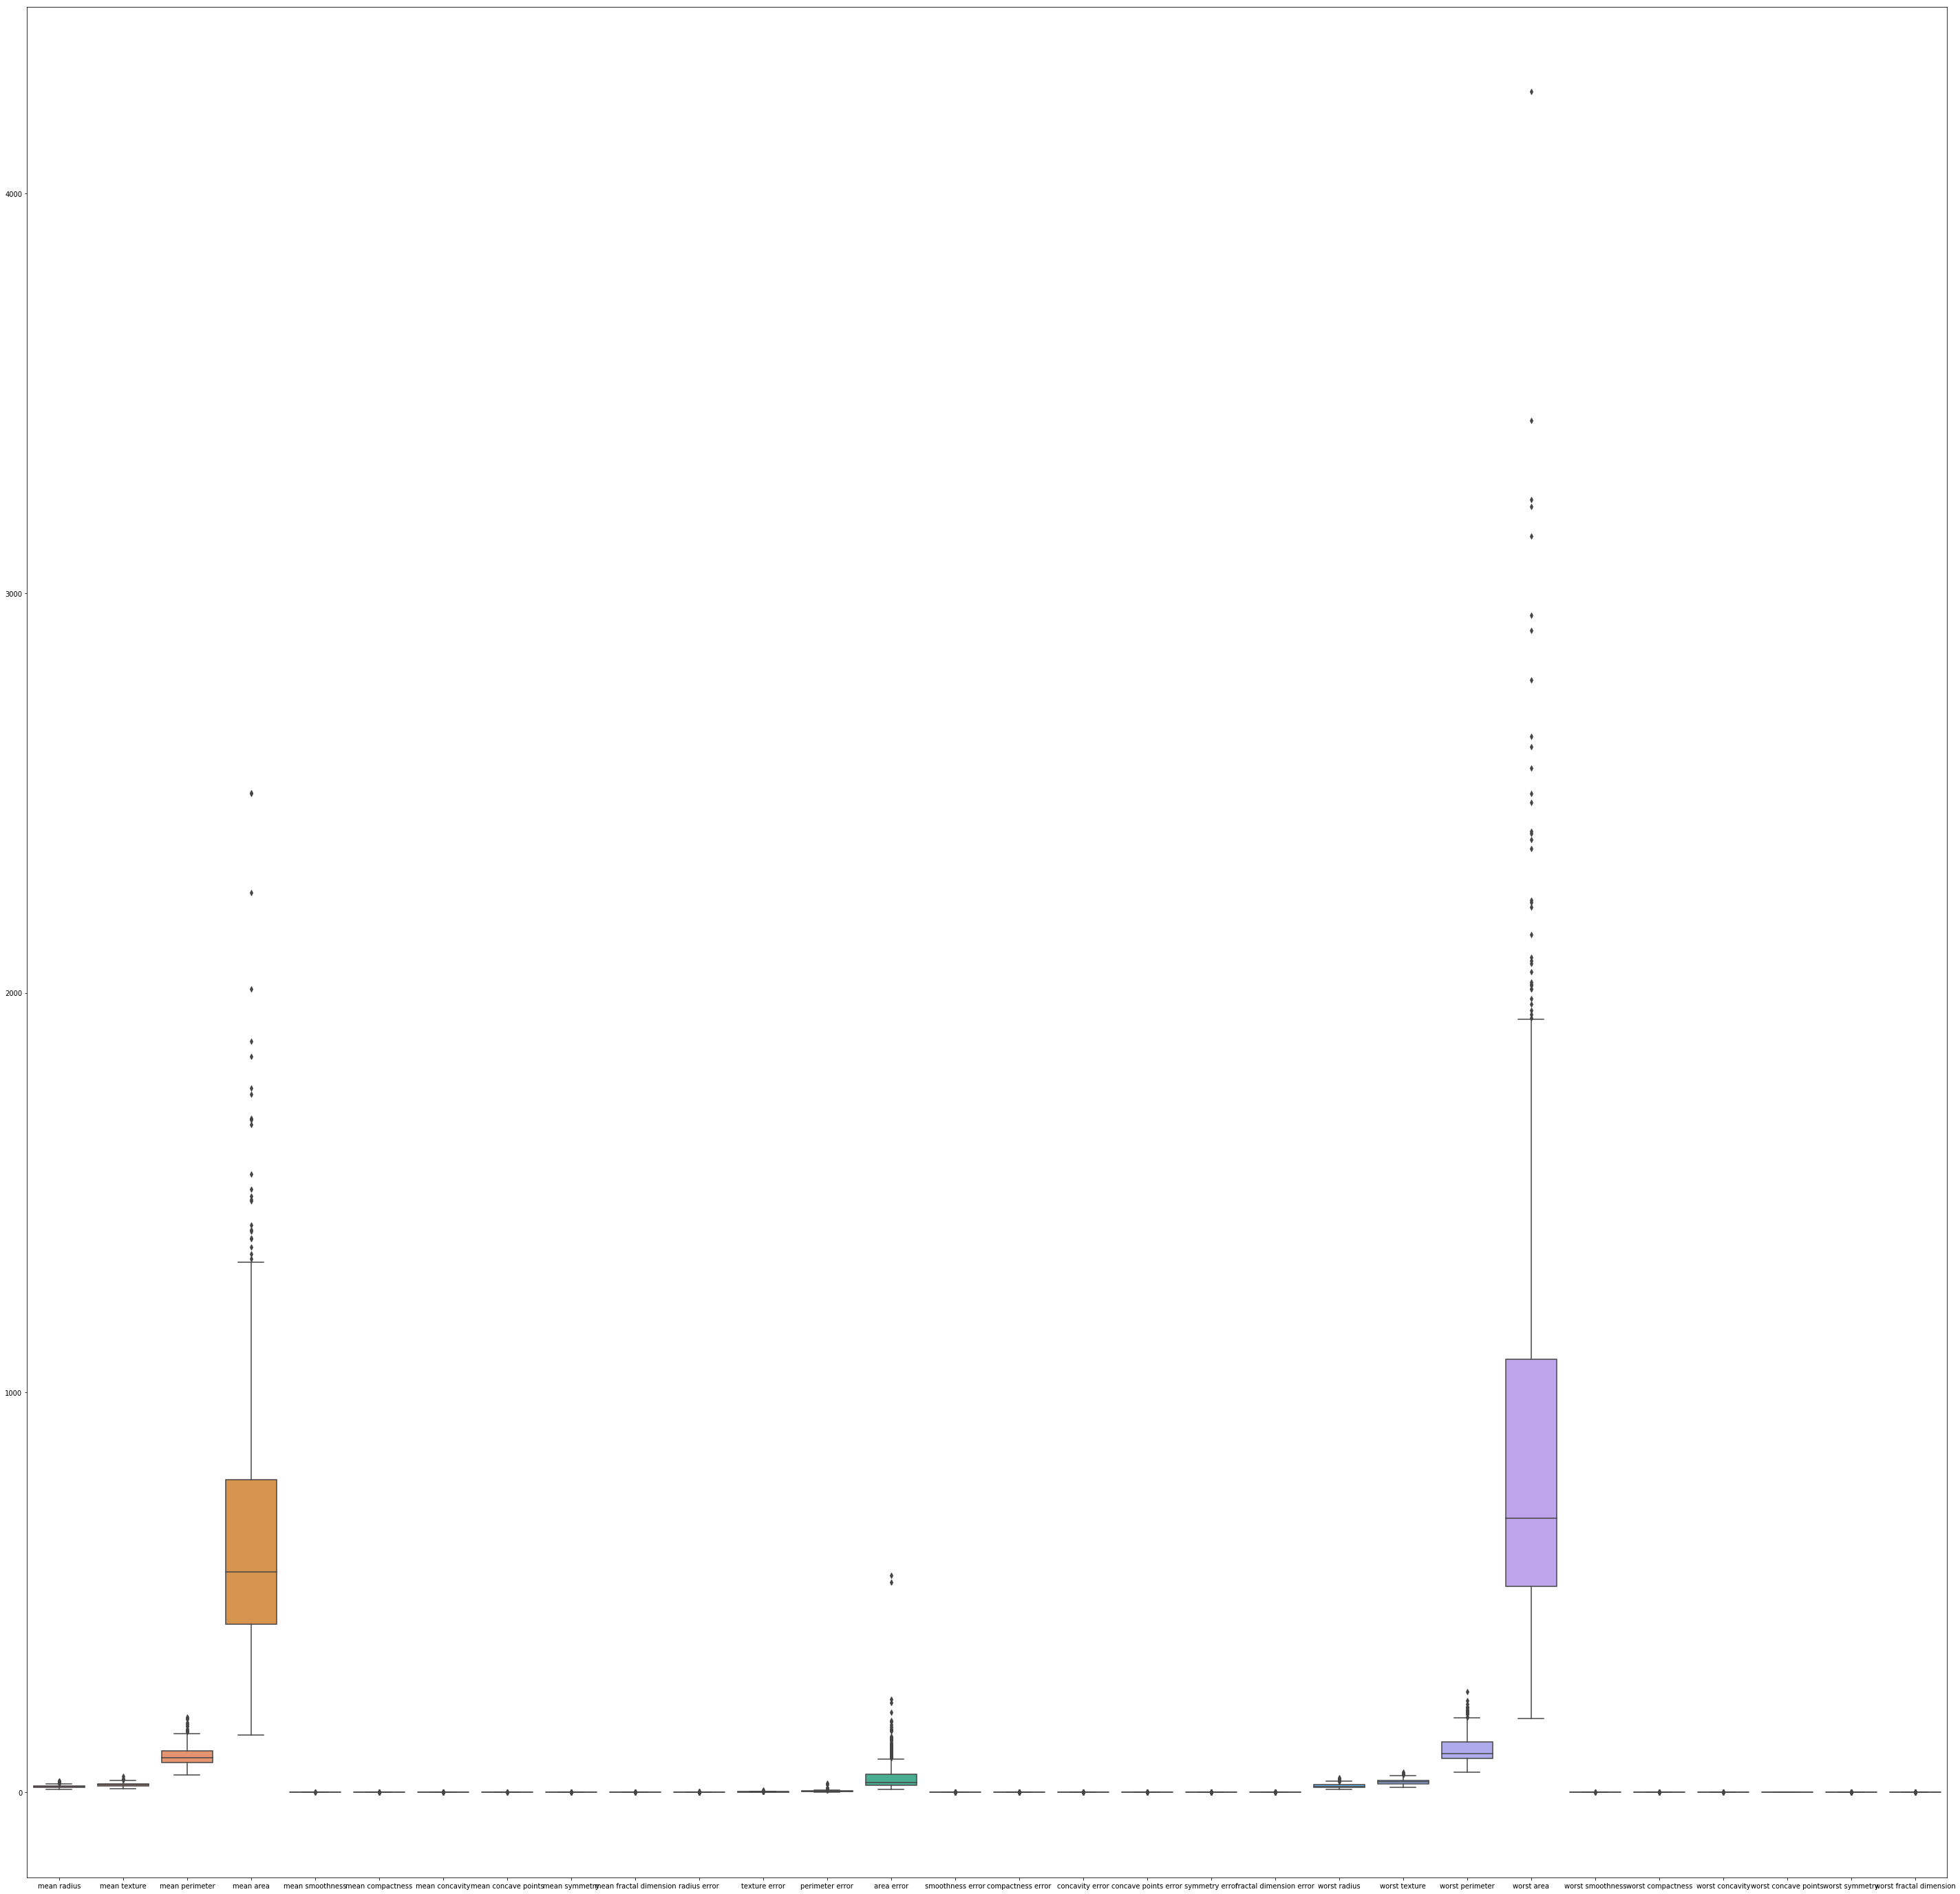

In [9]:
# Using seaborn
f = plt.figure(figsize=(50,50))
sns.boxplot(data=df)

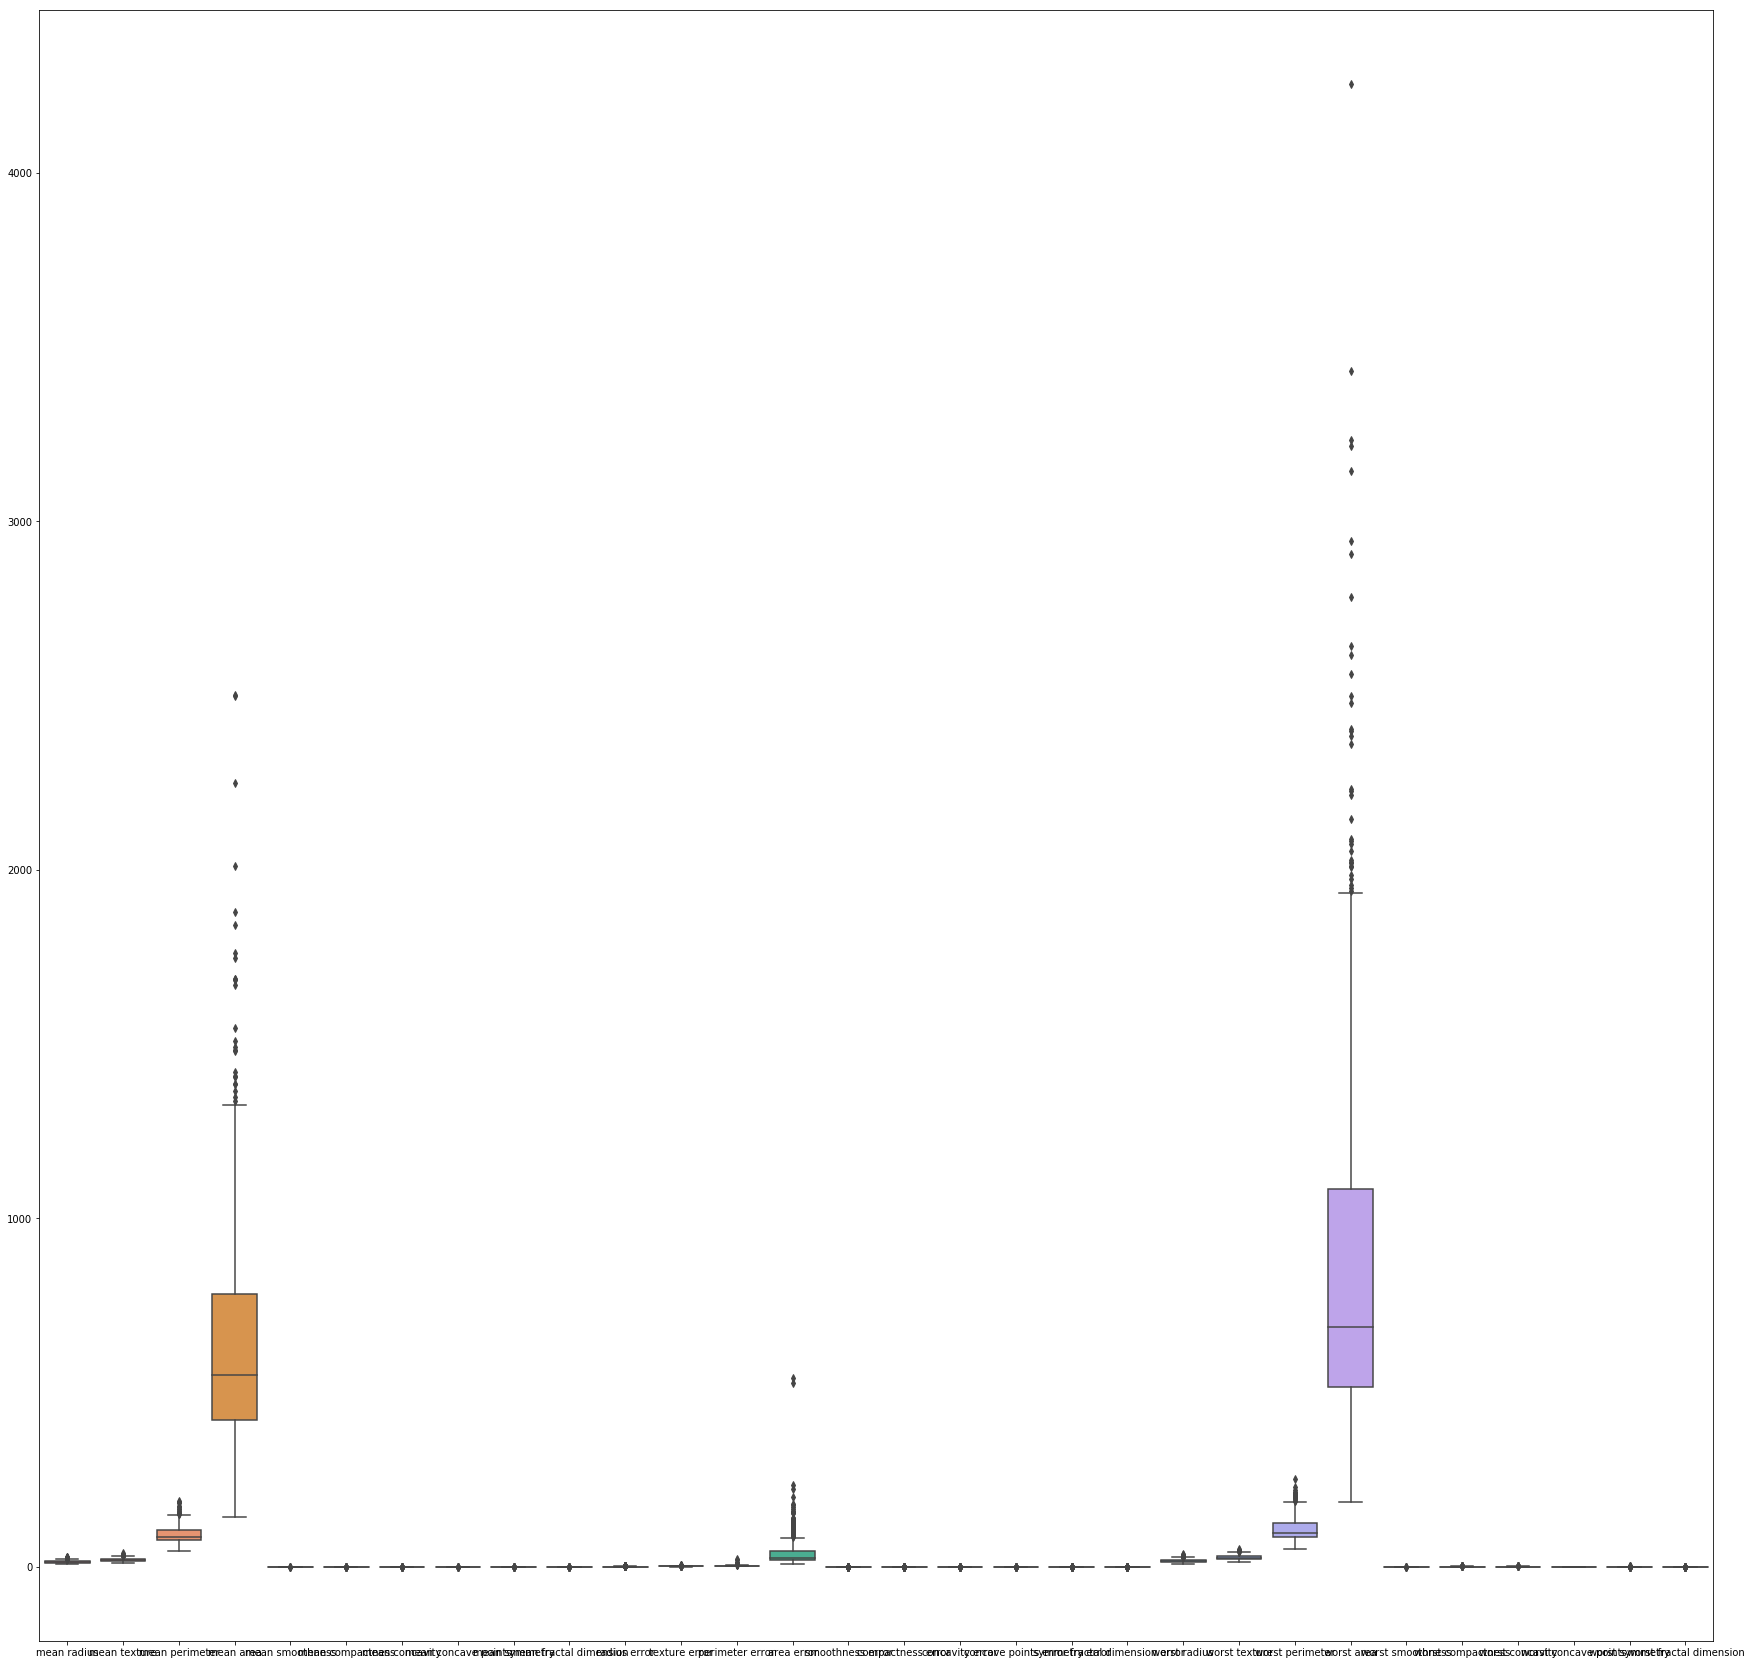

In [10]:
stats_df = df
plt.figure(figsize=(30,30))
sns.boxplot(data=stats_df)

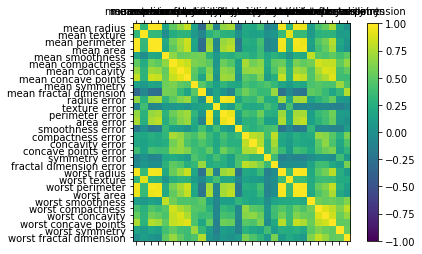

In [11]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,30,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

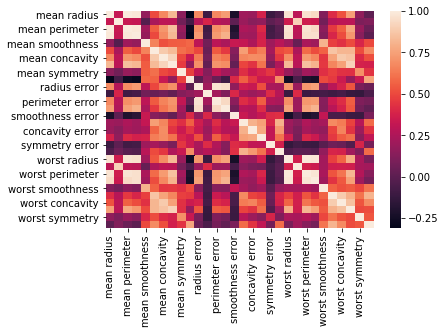

In [12]:
sns.heatmap(correlations)

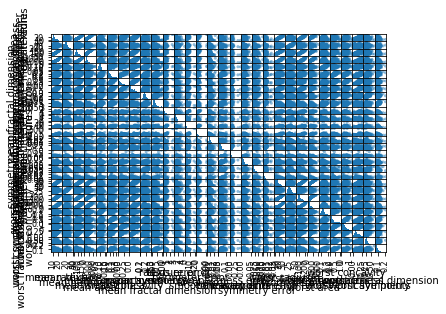

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

Data preparation

In [14]:
from numpy import set_printoptions
array = df.values
# separate array into input and output components
X = array[:,0:30]
Y = y
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.521 0.023 0.546 0.364 0.594 0.792 0.703 0.731 0.686 0.606 0.356 0.12
  0.369 0.274 0.159 0.351 0.136 0.301 0.312 0.183 0.621 0.142 0.668 0.451
  0.601 0.619 0.569 0.912 0.598 0.419]
 [0.643 0.273 0.616 0.502 0.29  0.182 0.204 0.349 0.38  0.141 0.156 0.083
  0.124 0.126 0.119 0.081 0.047 0.254 0.085 0.091 0.607 0.304 0.54  0.435
  0.348 0.155 0.193 0.639 0.234 0.223]
 [0.601 0.39  0.596 0.449 0.514 0.431 0.463 0.636 0.51  0.211 0.23  0.094
  0.18  0.163 0.151 0.284 0.097 0.39  0.206 0.127 0.556 0.36  0.508 0.375
  0.484 0.385 0.36  0.835 0.404 0.213]
 [0.21  0.361 0.234 0.103 0.811 0.811 0.566 0.523 0.776 1.    0.139 0.176
  0.127 0.038 0.251 0.543 0.143 0.354 0.728 0.287 0.248 0.386 0.241 0.094
  0.915 0.814 0.549 0.885 1.    0.774]
 [0.63  0.157 0.631 0.489 0.43  0.348 0.464 0.518 0.378 0.187 0.234 0.093
  0.221 0.164 0.332 0.168 0.144 0.357 0.136 0.146 0.52  0.124 0.507 0.342
  0.437 0.172 0.319 0.558 0.158 0.143]]


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 1.097e+00 -2.073e+00  1.270e+00  9.844e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.653e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.608e-01
   1.149e+00  9.071e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.536e-01  1.686e+00  1.909e+00 -8.270e-01 -4.871e-01
  -2.385e-02  5.481e-01  1.392e-03 -8.687e-01  4.993e-01 -8.762e-01
   2.633e-01  7.424e-01 -6.054e-01 -6.929e-01 -4.408e-01  2.602e-01
  -8.055e-01 -9.944e-02  1.806e+00 -3.692e-01  1.535e+00  1.890e+00
  -3.756e-01 -4.304e-01 -1.467e-01  1.087e+00 -2.439e-01  2.812e-01]
 [ 1.580e+00  4.562e-01  1.567e+00  1.559e+00  9.422e-01  1.053e+00
   1.363e+00  2.037e+00  9.397e-01 -3.980e-01  1.229e+00 -7.801e-01
   8.509e-01  1.181e+00 -2.970e-01  8.150e-01  2.131e-01  1.425e+00
   2.370e-01  2.936e-01  1.512e+00 -2.397e-02  1.347e+00  1.456e+00
   5.274e-01  1.083e+00  8.550e-01  1.955e+00 

In [16]:
# Normalise data (length of 1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[7.925e-03 4.573e-03 5.410e-02 4.410e-01 5.216e-05 1.223e-04 1.322e-04
  6.480e-05 1.066e-04 3.468e-05 4.824e-04 3.988e-04 3.784e-03 6.758e-02
  2.819e-06 2.160e-05 2.367e-05 6.991e-06 1.323e-05 2.728e-06 1.118e-02
  7.635e-03 8.132e-02 8.895e-01 7.146e-05 2.932e-04 3.136e-04 1.169e-04
  2.027e-04 5.238e-05]
 [8.666e-03 7.486e-03 5.599e-02 5.586e-01 3.570e-05 3.313e-05 3.661e-05
  2.956e-05 7.634e-05 2.387e-05 2.290e-04 3.092e-04 1.432e-03 3.121e-02
  2.201e-06 5.510e-06 7.836e-06 5.645e-06 5.852e-06 1.488e-06 1.053e-02
  9.862e-03 6.690e-02 8.240e-01 5.215e-05 7.861e-05 1.018e-04 7.836e-05
  1.159e-04 3.750e-05]
 [9.367e-03 1.011e-02 6.184e-02 5.723e-01 5.214e-05 7.607e-05 9.390e-05
  6.084e-05 9.842e-05 2.854e-05 3.547e-04 3.743e-04 2.181e-03 4.473e-02
  2.926e-06 1.906e-05 1.823e-05 9.790e-06 1.070e-05 2.174e-06 1.121e-02
  1.214e-02 7.255e-02 8.130e-01 6.869e-05 2.019e-04 2.143e-04 1.156e-04
  1.719e-04 4.166e-05]
 [1.632e-02 2.913e-02 1.109e-01 5.519e-01 2.037e-04 4.058e-04 3.451

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
df.info()
array = df.values
X = array[:,0:29]
Y = y
kfold = KFold(n_splits=10, random_state=7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [18]:
from sklearn.linear_model import LogisticRegression
results = cross_val_score(LogisticRegression(), X, Y, cv=kfold)
print(results.mean()) ;# prints the mean estimated accuracy

0.9490601503759397


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
results = cross_val_score(LinearDiscriminantAnalysis(), X, Y, cv=kfold)
print(results.mean())

0.9560463659147869


In [20]:
from sklearn.neighbors import KNeighborsClassifier
results = cross_val_score(KNeighborsClassifier(), X, Y, cv=kfold)
print(results.mean())

0.9262531328320801


In [21]:
from sklearn.naive_bayes import GaussianNB
results = cross_val_score(GaussianNB(), X, Y, cv=kfold)
print(results.mean())

0.9402882205513784


In [22]:
from sklearn.tree import DecisionTreeClassifier
results = cross_val_score(DecisionTreeClassifier(), X, Y, cv=kfold)
print(results.mean())

0.9420426065162906


In [23]:
from sklearn.svm import SVC
results = cross_val_score(SVC(), X, Y, cv=kfold)
print(results.mean())

0.6276629072681705


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))

In [25]:
# The scoring function to use
scoring = 'accuracy'
sc1 = 'precision'
sc2 = 'recall'
sc3 = 'f1'
metrics_table = [scoring, sc1, sc2, sc3] 

In [26]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for metric in metrics_table: 
    print("....",metric,".....")
    for name, model in models:
      kfold = KFold(n_splits=10, random_state=7)
      cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=metric)
      results.append(cv_results)
      names.append(name)
      print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

.... accuracy .....
 LR: 0.949060 (+/- 0.026512)
LDA: 0.956046 (+/- 0.040220)
kNN: 0.926253 (+/- 0.046232)
 DT: 0.934962 (+/- 0.027262)
 NB: 0.940288 (+/- 0.037750)
SVM: 0.627663 (+/- 0.176997)
.... precision .....
 LR: 0.930932 (+/- 0.109389)
LDA: 0.917393 (+/- 0.113147)
kNN: 0.904220 (+/- 0.138693)
 DT: 0.921449 (+/- 0.098866)
 NB: 0.915585 (+/- 0.098612)
SVM: 0.627663 (+/- 0.176997)
.... recall .....
 LR: 0.973368 (+/- 0.025849)
LDA: 0.994817 (+/- 0.010433)
kNN: 0.964068 (+/- 0.032874)
 DT: 0.948119 (+/- 0.028084)
 NB: 0.974055 (+/- 0.032613)
SVM: 1.000000 (+/- 0.000000)
.... f1 .....
 LR: 0.946901 (+/- 0.063294)
LDA: 0.950303 (+/- 0.069414)
kNN: 0.925229 (+/- 0.089086)
 DT: 0.930745 (+/- 0.044640)
 NB: 0.940335 (+/- 0.059254)
SVM: 0.753778 (+/- 0.161991)


<IPython.core.display.Javascript object>


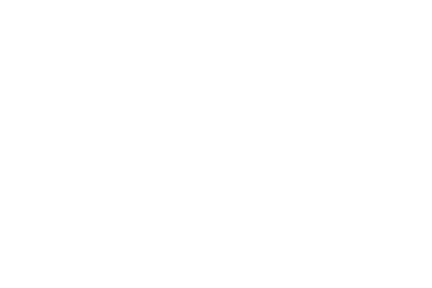

<IPython.core.display.Javascript object>


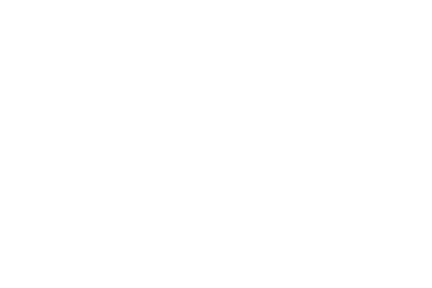

In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df, y, test_size = 0.2, random_state = 0)
cl = LinearDiscriminantAnalysis()
cl = cl.fit(xTrain,yTrain)
Train   = cl.predict(xTrain)
outTree = cl.predict(xTest)
#print(dtreeTrain.feature_importances_.tolist())
from sklearn.metrics import accuracy_score
#print("Train Accuracy for Decision Tree Classifier: " + str(accuracy_score(yTrain, Train)*100)+"%")
print("Test Accuracy for Decision Tree Classifier: " + str(accuracy_score(yTest, outTree)*100)+"%")
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest, outTree)


Test Accuracy for Decision Tree Classifier: 96.49122807017544%


array([[43,  4],
       [ 0, 67]])

In [29]:
tn, fp, fn, tp = confusion_matrix(yTest, outTree).ravel()
(tn, fp, fn, tp)

(43, 4, 0, 67)